# Figure panel 5

In [ ]:
options(warn=-1)

In [ ]:
library_load <- suppressMessages(
    
    suppressWarnings(
        
        list(
        
            # Seurat 
            library(Seurat), 

            # TradeSeq
            library(tradeSeq),

            # CCI 
            library(CellChat), 

            # Data 
            library(tidyverse), 
            library(data.table), 

            # miloR
            library(miloR), 
            library(ggbeeswarm), 

            # Plotting 
            library(ggplot2), 
            library(patchwork), 
            library(cowplot), 
            library(ComplexHeatmap), 

            # Pyhton compatibility
            library(reticulate)

        )
    )
)

In [ ]:
# Configure reticulate 
# use_condaenv(condaenv="p.3.10.16-FD20200109SPLENO", conda="/nobackup/peer/fdeckert/miniconda3/bin/conda", required=NULL)
# py_config()

In [ ]:
random_seed <- 42
set.seed(random_seed)

In [ ]:
# Set working directory to project root
setwd("/research/peer/fdeckert/FD20200109SPLENO")

In [ ]:
# Source
source("bin/so_pl.R")
source("bin/dea_pp.R")
source("bin/dea_pl.R")
source("bin/gsea_pp.R")
source("bin/gsea_pl.R")
source("bin/tradeseq_pl.R")
source("bin/tradeseq_pp.R")

In [ ]:
# Plotting Theme
source("plotting_global.R")
ggplot2::theme_set(theme_global_set(size_select=4)) # From project global source()

# Import scRNAseq data 

In [ ]:
so <- readRDS("data/scRNAseq/object/pp_1.rds")
so <- NormalizeData(so)

# Import erythroid lineage fitgam and make contrasts

In [ ]:
tradeseq_res <- readRDS("result/lineage/tradeseq_res_2.rds")
fitgam <- tradeseq_res[["fitgam"]]
ptpg <- tradeseq_res[["ptpg"]]

In [147]:
contrast_1 <- c("IFNAR_fl_Baseline_D0", "IFNAR_fl_CpG_D1")
ptpg_res_1 <- ptpg[ptpg[["contrast"]]==paste0(contrast_1, collapse=":"), ]

contrast_2 <- c("IFNAR_fl_Baseline_D0", "IFNAR_fl_CpG_D3")
ptpg_res_2 <- ptpg[ptpg[["contrast"]]==paste0(contrast_2, collapse=":"), ]

contrast_3 <- c("IFNAR_fl_CpG_D1", "IFNAR_fl_CpG_D3")
ptpg_res_3 <- ptpg[ptpg[["contrast"]]==paste0(contrast_3, collapse=":"), ]



contrast_4 <- c("IFNAR_fl_Baseline_D0", "IFNAR_fl_LysM_cre_CpG_D1")
ptpg_res_4 <- ptpg[ptpg[["contrast"]]==paste0(contrast_4, collapse=":"), ]

contrast_5 <- c("IFNAR_fl_Baseline_D0", "IFNAR_fl_LysM_cre_CpG_D3")
ptpg_res_5 <- ptpg[ptpg[["contrast"]]==paste0(contrast_5, collapse=":"), ]

contrast_6 <- c("IFNAR_fl_LysM_cre_CpG_D1", "IFNAR_fl_LysM_cre_CpG_D3")
ptpg_res_6 <- ptpg[ptpg[["contrast"]]==paste0(contrast_6, collapse=":"), ]



contrast_7 <- c("IFNAR_fl_Baseline_D0", "IFNAR_fl_LysM_cre_Baseline_D0")
ptpg_res_7 <- ptpg[ptpg[["contrast"]]==paste0(contrast_7, collapse=":"), ]

contrast_8 <- c("IFNAR_fl_CpG_D1", "IFNAR_fl_LysM_cre_CpG_D1")
ptpg_res_8 <- ptpg[ptpg[["contrast"]]==paste0(contrast_8, collapse=":"), ]

contrast_9 <- c("IFNAR_fl_CpG_D3", "IFNAR_fl_LysM_cre_CpG_D3")
ptpg_res_9 <- ptpg[ptpg[["contrast"]]==paste0(contrast_9, collapse=":"), ]

# Transcription factor heatmap of smoothed expression 

## Load pruned graph TF and target gens 

In [148]:
reg <- read.csv("result/scenic/scRNAseq/res_1/reg.csv", row.names=1, skip=1)
colnames(reg) <- c("TF", "target_genes")

In [149]:
tf <- c("Nfkb1", "Myb", "Fli1", "Gata2", "E2f3", "Bcl11a", "Myc", "Ikzf1", "Zfp148", "Irf8", "Irf1", "Irf7", "Stat1", "Stat2", "Stat3", "Bclaf1", "E2f4", "Gata1", "E2f7", "Tal1", "E2f1", "Mybl2", "Klf1", "E2f8", "Klf3", "E2f2")

## PTCG D1 or D3 UP vs Ctl 

In [159]:
contrast_vec <- c("IFNAR_fl_Baseline_D0", "IFNAR_fl_LysM_cre_Baseline_D0", "IFNAR_fl_CpG_D1", "IFNAR_fl_LysM_cre_CpG_D1", "IFNAR_fl_CpG_D3", "IFNAR_fl_LysM_cre_CpG_D3")
color_mat <- color$sample_group[c("IFNAR_fl_Baseline_D0", "IFNAR_fl_LysM_cre_Baseline_D0", "IFNAR_fl_CpG_D1", "IFNAR_fl_LysM_cre_CpG_D1", "IFNAR_fl_CpG_D3", "IFNAR_fl_LysM_cre_CpG_D3")]

In [160]:
genes_diff_1 <- unique(c(ptpg_res_1[ptpg_res_1$ptpg_class=="IFNAR_fl_CpG_D1", ]$gene, ptpg_res_2[ptpg_res_2$ptpg_class=="IFNAR_fl_CpG_D3", ]$gene, ptpg_res_4[ptpg_res_4$ptpg_class=="IFNAR_fl_LysM_cre_CpG_D1", ]$gene, ptpg_res_5[ptpg_res_5$ptpg_class=="IFNAR_fl_LysM_cre_CpG_D3", ]$gene))
genes_diff_2 <- unique(c(ptpg_res_7[ptpg_res_7$ptpg_class!="Canonical", ]$gene, ptpg_res_8[ptpg_res_8$ptpg_class!="Canonical", ]$gene, ptpg_res_9[ptpg_res_9$ptpg_class!="Canonical", ]$gene))
genes_diff <- genes_diff_1[!genes_diff_1 %in% genes_diff_2]
length(genes_diff)

[1] 56

In [161]:
pt_split_ptpg <- pt_split(fitgam, genes_diff, contrast_vec)

In [162]:
tf_tg_mat_ptpg <- reg[reg$target_genes %in% genes_diff & reg$TF %in% ptpg$gene, ]
tf_tg_mat_ptpg <- tf_tg_pp(tf_tg_mat_ptpg)
tf_tg_mat_ptpg <- tf_tg_prune(tf_tg_mat_ptpg, pt_split_ptpg, tf_ratio=0, tf_sum=0, tf_fill=TRUE)
tf_tg_mat_ptpg <- tf_tg_mat_ptpg[, tf[tf %in% colnames(tf_tg_mat_ptpg)]]

In [163]:
tf_fill <- setdiff(tf, colnames(tf_tg_mat_ptpg))
tf_tg_mat_ptpg[, tf_fill] <- 0
tf_tg_mat_ptpg <- tf_tg_mat_ptpg[, tf, drop=FALSE]

In [164]:
pt_tf_hm_1 <- pt_tf_hm(tf_tg_mat_ptpg, row_split=pt_split_ptpg, height=50, fontsize_select=2, cluster_rows=FALSE, cluster_columns=FALSE, use_raster=FALSE)
pt_hm_1 <- pt_hm(fitgam, names(pt_split_ptpg), "IFNAR_fl_Baseline_D0", contrast_vec, 50, color_mat[1], row_split=pt_split_ptpg, width=0.75, height=50, fontsize_select=2, use_raster=TRUE)
pt_hm_2 <- pt_hm(fitgam, names(pt_split_ptpg), "IFNAR_fl_LysM_cre_Baseline_D0", contrast_vec, 50, color_mat[2], row_split=pt_split_ptpg, width=0.75, height=50, fontsize_select=2, use_raster=TRUE)
pt_hm_3 <- pt_hm(fitgam, names(pt_split_ptpg), "IFNAR_fl_CpG_D1", contrast_vec, 50, color_mat[3], row_split=pt_split_ptpg, width=0.75, height=50, fontsize_select=2, use_raster=TRUE)
pt_hm_4 <- pt_hm(fitgam, names(pt_split_ptpg), "IFNAR_fl_LysM_cre_CpG_D1", contrast_vec, 50, color_mat[4], row_split=pt_split_ptpg, width=0.75, height=50, fontsize_select=2, use_raster=TRUE)
pt_hm_5 <- pt_hm(fitgam, names(pt_split_ptpg), "IFNAR_fl_CpG_D3", contrast_vec, 50, color_mat[5], row_split=pt_split_ptpg, width=0.75, height=50, fontsize_select=2, use_raster=TRUE)
pt_hm_6 <- pt_hm(fitgam, names(pt_split_ptpg), "IFNAR_fl_LysM_cre_CpG_D3", contrast_vec, 50, color_mat[6], row_split=pt_split_ptpg, width=0.75, height=50, fontsize_select=2, use_raster=TRUE)

In [165]:
row_genes <- rownames(pt_tf_hm_1@matrix)

row_genes <- row_genes[row_genes %in% rownames(pt_tf_hm_1@matrix)]

row_anno <- rowAnnotation(
    
    labels=anno_mark(
        at=which(rownames(pt_tf_hm_1@matrix) %in% row_genes),
        labels=rownames(pt_tf_hm_1@matrix)[which(rownames(pt_tf_hm_1@matrix) %in% row_genes)],
        side="left", 
        labels_gp=gpar(fontsize=6), 
        link_width=unit(3, "mm")
    
    )

)

In [166]:
pdf("result/figures/1_scRNAseq/panel_5/hm_tf_ptcg_d1_or_d3_up_vs_ctl.pdf", width=10, height=6)

draw(row_anno + pt_tf_hm_1 + pt_hm_1 + pt_hm_2 + pt_hm_3 + pt_hm_4 + pt_hm_5 + pt_hm_6)

dev.off()

pdf 
  2

## PTCG D1 or D3 DOWN vs Ctl 

In [158]:
contrast_vec <- c("IFNAR_fl_Baseline_D0", "IFNAR_fl_LysM_cre_Baseline_D0", "IFNAR_fl_CpG_D1", "IFNAR_fl_LysM_cre_CpG_D1", "IFNAR_fl_CpG_D3", "IFNAR_fl_LysM_cre_CpG_D3")
color_mat <- color$sample_group[c("IFNAR_fl_Baseline_D0", "IFNAR_fl_LysM_cre_Baseline_D0", "IFNAR_fl_CpG_D1", "IFNAR_fl_LysM_cre_CpG_D1", "IFNAR_fl_CpG_D3", "IFNAR_fl_LysM_cre_CpG_D3")]

In [168]:
genes_diff_1 <- unique(c(ptpg_res_1[ptpg_res_1$ptpg_class=="IFNAR_fl_Baseline_D0", ]$gene, ptpg_res_2[ptpg_res_2$ptpg_class=="IFNAR_fl_Baseline_D0", ]$gene, ptpg_res_4[ptpg_res_4$ptpg_class=="IFNAR_fl_LysM_cre_Baseline_D0", ]$gene, ptpg_res_5[ptpg_res_5$ptpg_class=="IFNAR_fl_LysM_cre_Baseline_D0", ]$gene))
genes_diff_2 <- unique(c(ptpg_res_7[ptpg_res_7$ptpg_class!="Canonical", ]$gene, ptpg_res_8[ptpg_res_8$ptpg_class!="Canonical", ]$gene, ptpg_res_9[ptpg_res_9$ptpg_class!="Canonical", ]$gene))
genes_diff <- genes_diff_1[!genes_diff_1 %in% genes_diff_2]
length(genes_diff_1)
length(genes_diff_2)
length(genes_diff)

[1] 13

[1] 501

[1] 8

In [169]:
pt_split_ptpg <- pt_split(fitgam, genes_diff, contrast_vec)

In [170]:
tf_tg_mat_ptpg <- reg[reg$target_genes %in% genes_diff & reg$TF %in% ptpg$gene, ]
tf_tg_mat_ptpg <- tf_tg_pp(tf_tg_mat_ptpg)
tf_tg_mat_ptpg <- tf_tg_prune(tf_tg_mat_ptpg, pt_split_ptpg, tf_ratio=0, tf_sum=0, tf_fill=TRUE)
tf_tg_mat_ptpg <- tf_tg_mat_ptpg[, tf[tf %in% colnames(tf_tg_mat_ptpg)]]

In [171]:
tf_fill <- setdiff(tf, colnames(tf_tg_mat_ptpg))
tf_tg_mat_ptpg[, tf_fill] <- 0
tf_tg_mat_ptpg <- tf_tg_mat_ptpg[, tf, drop=FALSE]

In [172]:
pt_tf_hm_1 <- pt_tf_hm(tf_tg_mat_ptpg, row_split=pt_split_ptpg, height=50, fontsize_select=2, cluster_rows=FALSE, cluster_columns=FALSE, use_raster=FALSE)
pt_hm_1 <- pt_hm(fitgam, names(pt_split_ptpg), "IFNAR_fl_Baseline_D0", contrast_vec, 50, color_mat[1], row_split=pt_split_ptpg, width=0.75, height=50, fontsize_select=2, use_raster=TRUE)
pt_hm_2 <- pt_hm(fitgam, names(pt_split_ptpg), "IFNAR_fl_LysM_cre_Baseline_D0", contrast_vec, 50, color_mat[2], row_split=pt_split_ptpg, width=0.75, height=50, fontsize_select=2, use_raster=TRUE)
pt_hm_3 <- pt_hm(fitgam, names(pt_split_ptpg), "IFNAR_fl_CpG_D1", contrast_vec, 50, color_mat[3], row_split=pt_split_ptpg, width=0.75, height=50, fontsize_select=2, use_raster=TRUE)
pt_hm_4 <- pt_hm(fitgam, names(pt_split_ptpg), "IFNAR_fl_LysM_cre_CpG_D1", contrast_vec, 50, color_mat[4], row_split=pt_split_ptpg, width=0.75, height=50, fontsize_select=2, use_raster=TRUE)
pt_hm_5 <- pt_hm(fitgam, names(pt_split_ptpg), "IFNAR_fl_CpG_D3", contrast_vec, 50, color_mat[5], row_split=pt_split_ptpg, width=0.75, height=50, fontsize_select=2, use_raster=TRUE)
pt_hm_6 <- pt_hm(fitgam, names(pt_split_ptpg), "IFNAR_fl_LysM_cre_CpG_D3", contrast_vec, 50, color_mat[6], row_split=pt_split_ptpg, width=0.75, height=50, fontsize_select=2, use_raster=TRUE)

In [173]:
row_genes <- rownames(pt_tf_hm_1@matrix)

row_genes <- row_genes[row_genes %in% rownames(pt_tf_hm_1@matrix)]

row_anno <- rowAnnotation(
    
    labels=anno_mark(
        at=which(rownames(pt_tf_hm_1@matrix) %in% row_genes),
        labels=rownames(pt_tf_hm_1@matrix)[which(rownames(pt_tf_hm_1@matrix) %in% row_genes)],
        side="left", 
        labels_gp=gpar(fontsize=6), 
        link_width=unit(3, "mm")
    
    )

)

In [174]:
pdf("result/figures/1_scRNAseq/panel_5/hm_tf_ptcg_d1_or_d3_down_vs_ctl.pdf", width=10, height=6)

draw(row_anno + pt_tf_hm_1 + pt_hm_1 + pt_hm_2 + pt_hm_3 + pt_hm_4 + pt_hm_5 + pt_hm_6)

dev.off()

pdf 
  2

## PTPG D3 (cre/+) UP vs D3 (+/+) 

In [215]:
contrast_vec <- c("IFNAR_fl_Baseline_D0", "IFNAR_fl_CpG_D3", "IFNAR_fl_LysM_cre_CpG_D3")
color_mat <- color$sample_group[c("IFNAR_fl_Baseline_D0", "IFNAR_fl_CpG_D3", "IFNAR_fl_LysM_cre_CpG_D3")]

In [216]:
genes_diff <- ptpg_res_9[ptpg_res_9$ptpg_class=="IFNAR_fl_LysM_cre_CpG_D3", ]$gene
length(genes_diff)

[1] 20

In [217]:
pt_split_ptpg <- pt_split(fitgam, genes_diff, "IFNAR_fl_LysM_cre_CpG_D3")

In [218]:
tf_tg_mat_ptpg <- reg[reg$target_genes %in% genes_diff & reg$TF %in% ptpg$gene, ]
tf_tg_mat_ptpg <- tf_tg_pp(tf_tg_mat_ptpg)
tf_tg_mat_ptpg <- tf_tg_prune(tf_tg_mat_ptpg, pt_split_ptpg, tf_ratio=0, tf_sum=0, tf_fill=TRUE)
tf_tg_mat_ptpg <- tf_tg_mat_ptpg[, tf[tf %in% colnames(tf_tg_mat_ptpg)]]

In [219]:
tf_fill <- setdiff(tf, colnames(tf_tg_mat_ptpg))
tf_tg_mat_ptpg[, tf_fill] <- 0
tf_tg_mat_ptpg <- tf_tg_mat_ptpg[, tf, drop=FALSE]

In [220]:
pt_tf_hm_1 <- pt_tf_hm(tf_tg_mat_ptpg, row_split=pt_split_ptpg, height=50, fontsize_select=2, cluster_rows=FALSE, cluster_columns=FALSE, use_raster=FALSE)
pt_hm_1 <- pt_hm(fitgam, names(pt_split_ptpg), "IFNAR_fl_Baseline_D0", contrast_vec, 50, color_mat[1], row_split=pt_split_ptpg, width=0.75, height=50, fontsize_select=2, use_raster=TRUE)
pt_hm_2 <- pt_hm(fitgam, names(pt_split_ptpg), "IFNAR_fl_CpG_D3", contrast_vec, 50, color_mat[2], row_split=pt_split_ptpg, width=0.75, height=50, fontsize_select=2, use_raster=TRUE)
pt_hm_3 <- pt_hm(fitgam, names(pt_split_ptpg), "IFNAR_fl_LysM_cre_CpG_D3", contrast_vec, 50, color_mat[3], row_split=pt_split_ptpg, width=0.75, height=50, fontsize_select=2, use_raster=TRUE)

In [231]:
row_genes <- rownames(pt_tf_hm_1@matrix)

row_anno <- rowAnnotation(
    
    labels=anno_mark(
        at=which(rownames(pt_tf_hm_1@matrix) %in% row_genes),
        labels=rownames(pt_tf_hm_1@matrix)[which(rownames(pt_tf_hm_1@matrix) %in% row_genes)],
        side="left", 
        labels_gp=gpar(fontsize=6), 
        link_width=unit(3, "mm")
    
    )

)

In [232]:
pdf("result/figures/1_scRNAseq/panel_5/hm_tf_ptpg_d3ko_up_vs_d3.pdf", width=6, height=6)

draw(row_anno + pt_tf_hm_1 + pt_hm_1 + pt_hm_2 + pt_hm_3)

dev.off()

pdf 
  2

## PTPG D3 (cre/+) DOWN vs D3 (+/+)

In [206]:
contrast_vec <- c("IFNAR_fl_Baseline_D0", "IFNAR_fl_CpG_D3", "IFNAR_fl_LysM_cre_CpG_D3")
color_mat <- color$sample_group[c("IFNAR_fl_Baseline_D0", "IFNAR_fl_CpG_D3", "IFNAR_fl_LysM_cre_CpG_D3")]

In [207]:
genes_diff <- ptpg_res_9[ptpg_res_9$ptpg_class=="IFNAR_fl_CpG_D3", ]$gene
length(genes_diff)

[1] 106

In [208]:
pt_split_ptpg <- pt_split(fitgam, genes_diff, "IFNAR_fl_CpG_D3")

In [209]:
tf_tg_mat_ptpg <- reg[reg$target_genes %in% genes_diff & reg$TF %in% ptpg$gene, ]
tf_tg_mat_ptpg <- tf_tg_pp(tf_tg_mat_ptpg)
tf_tg_mat_ptpg <- tf_tg_prune(tf_tg_mat_ptpg, pt_split_ptpg, tf_ratio=0, tf_sum=0, tf_fill=TRUE)
tf_tg_mat_ptpg <- tf_tg_mat_ptpg[, tf[tf %in% colnames(tf_tg_mat_ptpg)]]

In [210]:
tf_fill <- setdiff(tf, colnames(tf_tg_mat_ptpg))
tf_tg_mat_ptpg[, tf_fill] <- 0
tf_tg_mat_ptpg <- tf_tg_mat_ptpg[, tf, drop=FALSE]

In [211]:
pt_tf_hm_1 <- pt_tf_hm(tf_tg_mat_ptpg, row_split=pt_split_ptpg, height=50, fontsize_select=2, cluster_rows=FALSE, cluster_columns=FALSE, use_raster=FALSE)
pt_hm_1 <- pt_hm(fitgam, names(pt_split_ptpg), "IFNAR_fl_Baseline_D0", contrast_vec, 50, color_mat[1], row_split=pt_split_ptpg, width=0.75, height=50, fontsize_select=2, use_raster=TRUE)
pt_hm_2 <- pt_hm(fitgam, names(pt_split_ptpg), "IFNAR_fl_CpG_D3", contrast_vec, 50, color_mat[2], row_split=pt_split_ptpg, width=0.75, height=50, fontsize_select=2, use_raster=TRUE)
pt_hm_3 <- pt_hm(fitgam, names(pt_split_ptpg), "IFNAR_fl_LysM_cre_CpG_D3", contrast_vec, 50, color_mat[3], row_split=pt_split_ptpg, width=0.75, height=50, fontsize_select=2, use_raster=TRUE)

In [212]:
row_genes <- c(
    
    "Stat1", "Stat2", "Stat3", 
    "Irf1", "Irf7", "Irf8",  
    "Ifih1", "Ifitm3", "Ifi203", "Ifi44", "Ifi47", # Ifi47 is type II IFN specific 
    "Socs1", 
    "Usp18", "Atf3", "Jun", "Junb", "Jund", "Fos", "Fosb", "Ly6a", "Il18bp", "Oasl2", "Ifi44"

)

row_genes <- row_genes[row_genes %in% rownames(pt_tf_hm_1@matrix)]

row_anno <- rowAnnotation(
    
    labels=anno_mark(
        at=which(rownames(pt_tf_hm_1@matrix) %in% row_genes),
        labels=rownames(pt_tf_hm_1@matrix)[which(rownames(pt_tf_hm_1@matrix) %in% row_genes)],
        side="left", 
        labels_gp=gpar(fontsize=6), 
        link_width=unit(3, "mm")
    
    )

)

In [213]:
pdf("result/figures/1_scRNAseq/panel_5/hm_tf_ptpg_d3ko_down_vs_d3.pdf", width=6, height=6)

draw(row_anno + pt_tf_hm_1 + pt_hm_1 + pt_hm_2 + pt_hm_3)

dev.off()

pdf 
  2

# Line plots smoothed expression 

## Stress erythroid progenitor marker genes 

In [ ]:
contrast_vec <- c("IFNAR_fl_Baseline_D0", "IFNAR_fl_LysM_cre_Baseline_D0", "IFNAR_fl_CpG_D1", "IFNAR_fl_LysM_cre_CpG_D1", "IFNAR_fl_CpG_D3", "IFNAR_fl_LysM_cre_CpG_D3")
color_mat <- color$sample_group[c("IFNAR_fl_Baseline_D0", "IFNAR_fl_LysM_cre_Baseline_D0", "IFNAR_fl_CpG_D1", "IFNAR_fl_LysM_cre_CpG_D1", "IFNAR_fl_CpG_D3", "IFNAR_fl_LysM_cre_CpG_D3")]

In [ ]:
genes <- c("Kit", "Cd24a", "Tfrc", "Slamf1", "Cd9", "Ly6a")

In [ ]:
lp_1 <- lapply(genes, function(i) {plot_smooth(fitgam, gene=i, point=FALSE, condition_color=color_mat, line_size=unit(1.5/2.141959, "pt"), condition_line_type=TRUE) + annotate("text", x=0.5, y=0, label=i, hjust=0.5, vjust=-1, size=2) + theme(legend.position="none")})
lp_1 <- lapply(lp_1, function(p) egg::set_panel_size(p, width=unit(2.0, "cm"), height=unit(0.75, "cm")))
lp_1 <- do.call(gridExtra::arrangeGrob, c(lp_1, ncol=10, nrow=ceiling(length(lp_1)/10)))

In [ ]:
pdf("result/figures/1_scRNAseq/panel_5/lp_sep_marker.pdf", width=10*1.25, height=ceiling(length(lp_1)/10))

grid::grid.draw(lp_1)

dev.off()

## Surface receptors 

In [ ]:
contrast_vec <- c("IFNAR_fl_Baseline_D0", "IFNAR_fl_LysM_cre_Baseline_D0", "IFNAR_fl_CpG_D1", "IFNAR_fl_LysM_cre_CpG_D1", "IFNAR_fl_CpG_D3", "IFNAR_fl_LysM_cre_CpG_D3")
color_mat <- color$sample_group[c("IFNAR_fl_Baseline_D0", "IFNAR_fl_LysM_cre_Baseline_D0", "IFNAR_fl_CpG_D1", "IFNAR_fl_LysM_cre_CpG_D1", "IFNAR_fl_CpG_D3", "IFNAR_fl_LysM_cre_CpG_D3")]

In [ ]:
genes <- c("Ifnar1", "Ifnar2", "Ifngr1", "Ifngr2")

In [ ]:
lp_1 <- lapply(genes, function(i) {plot_smooth(fitgam, gene=i, point=FALSE, condition_color=color_mat, line_size=unit(1.5/2.141959, "pt"), condition_line_type=TRUE) + annotate("text", x=0.5, y=0, label=i, hjust=0.5, vjust=-1, size=2) + theme(legend.position="none")})
lp_1 <- lapply(lp_1, function(p) egg::set_panel_size(p, width=unit(2.0, "cm"), height=unit(0.75, "cm")))
lp_1 <- do.call(gridExtra::arrangeGrob, c(lp_1, ncol=10, nrow=ceiling(length(lp_1)/10)))

In [ ]:
pdf("result/figures/1_scRNAseq/panel_5/lp_receptor.pdf", width=10*1.25, height=ceiling(length(lp_1)/10))

grid::grid.draw(lp_1)

dev.off()

## PTPG CtlKO vs Ctl

In [ ]:
contrast_vec <- c("IFNAR_fl_Baseline_D0", "IFNAR_fl_LysM_cre_Baseline_D0")
color_mat <- color$sample_group[c("IFNAR_fl_Baseline_D0", "IFNAR_fl_LysM_cre_Baseline_D0")]

In [ ]:
genes <- ptpg_res_4[ptpg_res_4$ptpg_class=="Perturbed" , ]$gene
genes <- pt_split(fitgam, genes, contrast_vec) %>% names()

In [ ]:
lp_1 <- lapply(genes, function(i) {plot_smooth(fitgam, gene=i, point=FALSE, condition_color=color_mat, line_size=unit(1.5/2.141959, "pt"), condition_line_type=FALSE) + annotate("text", x=0.5, y=0, label=i, hjust=0.5, vjust=-1, size=2) + theme(legend.position="none")})
lp_1 <- lapply(lp_1, function(p) egg::set_panel_size(p, width=unit(2.0, "cm"), height=unit(0.75, "cm")))
lp_1 <- do.call(gridExtra::arrangeGrob, c(lp_1, ncol=10, nrow=ceiling(length(lp_1)/10)))

In [ ]:
pdf("result/figures/1_scRNAseq/panel_5/lp_ptpg_ctlko_vs_ctl.pdf", width=10*1.25, height=ceiling(length(lp_1)/10))

grid::grid.draw(lp_1)

dev.off()

## PTPG D1KO vs D1

In [ ]:
contrast_vec <- c("IFNAR_fl_Baseline_D0", "IFNAR_fl_LysM_cre_Baseline_D0", "IFNAR_fl_CpG_D1", "IFNAR_fl_LysM_cre_CpG_D1")
color_mat <- color$sample_group[c("IFNAR_fl_Baseline_D0", "IFNAR_fl_LysM_cre_Baseline_D0", "IFNAR_fl_CpG_D1", "IFNAR_fl_LysM_cre_CpG_D1")]

In [ ]:
genes <- ptpg_res_5[ptpg_res_5$ptpg_class=="Perturbed", ]$gene
genes <- pt_split(fitgam, genes, contrast_vec) %>% names()

In [ ]:
lp_1 <- lapply(genes, function(i) {plot_smooth(fitgam, gene=i, point=FALSE, condition_color=color_mat, line_size=unit(1.5/2.141959, "pt"), condition_line_type=FALSE) + annotate("text", x=0.5, y=0, label=i, hjust=0.5, vjust=-1, size=2) + theme(legend.position="none")})
lp_1 <- lapply(lp_1, function(p) egg::set_panel_size(p, width=unit(2.0, "cm"), height=unit(0.75, "cm")))
lp_1 <- do.call(gridExtra::arrangeGrob, c(lp_1, ncol=10, nrow=ceiling(length(lp_1)/10)))

In [ ]:
pdf("result/figures/1_scRNAseq/panel_5/lp_ptpg_d1ko_vs_d1.pdf", width=10*1.25, height=ceiling(length(lp_1)/10))

grid::grid.draw(lp_1)

dev.off()

## PTPG D3KO vs D3

In [ ]:
contrast_vec <- c("IFNAR_fl_Baseline_D0", "IFNAR_fl_LysM_cre_Baseline_D0", "IFNAR_fl_CpG_D3", "IFNAR_fl_LysM_cre_CpG_D3")
color_mat <- color$sample_group[c("IFNAR_fl_Baseline_D0", "IFNAR_fl_LysM_cre_Baseline_D0", "IFNAR_fl_CpG_D3", "IFNAR_fl_LysM_cre_CpG_D3")]

In [ ]:
genes <- ptpg_res_6[ptpg_res_6$ptpg_class=="Perturbed" , ]$gene
genes <- pt_split(fitgam, genes, contrast_vec) %>% names()

In [ ]:
lp_1 <- lapply(genes, function(i) {plot_smooth(fitgam, gene=i, point=FALSE, condition_color=color_mat, line_size=unit(1.5/2.141959, "pt"), condition_line_type=TRUE) + annotate("text", x=0.5, y=0, label=i, hjust=0.5, vjust=-1, size=2) + theme(legend.position="none")})
lp_1 <- lapply(lp_1, function(p) egg::set_panel_size(p, width=unit(2.0, "cm"), height=unit(0.75, "cm")))
lp_1 <- do.call(gridExtra::arrangeGrob, c(lp_1, ncol=10, nrow=ceiling(length(lp_1)/10)))

In [ ]:
pdf("result/figures/1_scRNAseq/panel_5/lp_ptpg_d3ko_vs_d3.pdf", width=10*1.25, height=ceiling(length(lp_1)/10))

grid::grid.draw(lp_1)

dev.off()

## PTPG D3KO UP vs D3

In [ ]:
contrast_vec <- c("IFNAR_fl_Baseline_D0", "IFNAR_fl_LysM_cre_Baseline_D0", "IFNAR_fl_CpG_D3", "IFNAR_fl_LysM_cre_CpG_D3")
color_mat <- color$sample_group[c("IFNAR_fl_Baseline_D0", "IFNAR_fl_LysM_cre_Baseline_D0", "IFNAR_fl_CpG_D3", "IFNAR_fl_LysM_cre_CpG_D3")]

In [ ]:
genes <- ptpg_res_6[ptpg_res_6$ptpg_class %in% c("IFNAR_fl_LysM_cre_CpG_D3") , ]$gene
genes <- pt_split(fitgam, genes, contrast_vec) %>% names()

In [ ]:
lp_1 <- lapply(genes, function(i) {plot_smooth(fitgam, gene=i, point=FALSE, condition_color=color_mat, line_size=unit(1.5/2.141959, "pt"), condition_line_type=TRUE) + annotate("text", x=0.5, y=0, label=i, hjust=0.5, vjust=-1, size=2) + theme(legend.position="none")})
lp_1 <- lapply(lp_1, function(p) egg::set_panel_size(p, width=unit(2.0, "cm"), height=unit(0.75, "cm")))
lp_1 <- do.call(gridExtra::arrangeGrob, c(lp_1, ncol=10, nrow=ceiling(length(lp_1)/10)))

In [ ]:
pdf("result/figures/1_scRNAseq/panel_5/lp_ptpg_d3ko_up_vs_d3.pdf", width=10*1.25, height=ceiling(length(lp_1)/10))

grid::grid.draw(lp_1)

dev.off()

## PTPG D3KO DOWN vs D3

In [ ]:
contrast_vec <- c("IFNAR_fl_Baseline_D0", "IFNAR_fl_LysM_cre_Baseline_D0", "IFNAR_fl_CpG_D3", "IFNAR_fl_LysM_cre_CpG_D3")
color_mat <- color$sample_group[c("IFNAR_fl_Baseline_D0", "IFNAR_fl_LysM_cre_Baseline_D0", "IFNAR_fl_CpG_D3", "IFNAR_fl_LysM_cre_CpG_D3")]

In [ ]:
genes <- ptpg_res_6[ptpg_res_6$ptpg_class %in% c("IFNAR_fl_CpG_D3") , ]$gene
genes <- pt_split(fitgam, genes, contrast_vec) %>% names()

In [ ]:
lp_1 <- lapply(genes, function(i) {plot_smooth(fitgam, gene=i, point=FALSE, condition_color=color_mat, line_size=unit(1.5/2.141959, "pt"), condition_line_type=TRUE) + annotate("text", x=0.5, y=0, label=i, hjust=0.5, vjust=-1, size=2) + theme(legend.position="none")})
lp_1 <- lapply(lp_1, function(p) egg::set_panel_size(p, width=unit(2.0, "cm"), height=unit(0.75, "cm")))
lp_1 <- do.call(gridExtra::arrangeGrob, c(lp_1, ncol=10, nrow=ceiling(length(lp_1)/10)))

In [ ]:
pdf("result/figures/1_scRNAseq/panel_5/lp_ptpg_d3ko_down_vs_d3.pdf", width=10*1.25, height=ceiling(length(lp_1)/10))

grid::grid.draw(lp_1)

dev.off()

## PTAG selected Ctl, CtlKO, D1, D1KO

In [ ]:
contrast_vec <- c("IFNAR_fl_Baseline_D0", "IFNAR_fl_LysM_cre_Baseline_D0", "IFNAR_fl_CpG_D1", "IFNAR_fl_LysM_cre_CpG_D1")
color_mat <- color$sample_group[c("IFNAR_fl_Baseline_D0", "IFNAR_fl_LysM_cre_Baseline_D0", "IFNAR_fl_CpG_D1", "IFNAR_fl_LysM_cre_CpG_D1")]

In [ ]:
genes <- c("Stat1", "Stat2", "Stat3", "Irf1", "Socs1", "Usp18", "Atf3", "Jun", "Junb", "Jund", "Fos", "Fosb", "Ly6a", "Kit", "Erfe")

lp_1 <- lapply(genes, function(i) {plot_smooth(fitgam, gene=i, point=FALSE, condition_color=color_mat, line_size=unit(1.0/2.141959, "pt"), y_scale_full=TRUE, condition_line_type=FALSE) + annotate("text", x=0.5, y=0, label=i, hjust=0.5, vjust=-1, size=2) + theme(legend.position="none")})

In [ ]:
pdf("result/figures/1_scRNAseq/panel_5/lp_ptag_ctl_ctlko_d1_d1ko.pdf", width=1.5, height=10)

gridExtra::grid.arrange(
    
    lp_1[[1]] %>% egg::set_panel_size(., width=unit(2.0, "cm"), height=unit(0.75, "cm")), 
    lp_1[[2]] %>% egg::set_panel_size(., width=unit(2.0, "cm"), height=unit(0.75, "cm")), 
    lp_1[[3]] %>% egg::set_panel_size(., width=unit(2.0, "cm"), height=unit(0.75, "cm")), 
    lp_1[[4]] %>% egg::set_panel_size(., width=unit(2.0, "cm"), height=unit(0.75, "cm")), 
    lp_1[[5]] %>% egg::set_panel_size(., width=unit(2.0, "cm"), height=unit(0.75, "cm")), 
    lp_1[[6]] %>% egg::set_panel_size(., width=unit(2.0, "cm"), height=unit(0.75, "cm")),
    lp_1[[7]] %>% egg::set_panel_size(., width=unit(2.0, "cm"), height=unit(0.75, "cm")),
    lp_1[[8]] %>% egg::set_panel_size(., width=unit(2.0, "cm"), height=unit(0.75, "cm")), 
    lp_1[[9]] %>% egg::set_panel_size(., width=unit(2.0, "cm"), height=unit(0.75, "cm")), 
    lp_1[[10]] %>% egg::set_panel_size(., width=unit(2.0, "cm"), height=unit(0.75, "cm")), 
    lp_1[[11]] %>% egg::set_panel_size(., width=unit(2.0, "cm"), height=unit(0.75, "cm")),
    lp_1[[12]] %>% egg::set_panel_size(., width=unit(2.0, "cm"), height=unit(0.75, "cm")),
    lp_1[[13]] %>% egg::set_panel_size(., width=unit(2.0, "cm"), height=unit(0.75, "cm")),
    lp_1[[14]] %>% egg::set_panel_size(., width=unit(2.0, "cm"), height=unit(0.75, "cm")), 
    lp_1[[15]] %>% egg::set_panel_size(., width=unit(2.0, "cm"), height=unit(0.75, "cm")), ncol=1
    
)

dev.off()

## PTAG selected Ctl, CtlKO, D3, D3KO

In [ ]:
contrast_vec <- c("IFNAR_fl_Baseline_D0", "IFNAR_fl_LysM_cre_Baseline_D0", "IFNAR_fl_CpG_D3", "IFNAR_fl_LysM_cre_CpG_D3")
color_mat <- color$sample_group[c("IFNAR_fl_Baseline_D0", "IFNAR_fl_LysM_cre_Baseline_D0", "IFNAR_fl_CpG_D3", "IFNAR_fl_LysM_cre_CpG_D3")]

In [ ]:
genes <- c("Stat1", "Stat2", "Stat3", "Irf1", "Socs1", "Usp18", "Atf3", "Jun", "Junb", "Jund", "Fos", "Fosb", "Ly6a", "Kit", "Erfe")
genes %in% ptpg_res_6[ptpg_res_6$ptpg_class=="IFNAR_fl_CpG_D3", ]$gene
genes %in% ptpg_res_6[ptpg_res_6$ptpg_class %in% c("Perturbed", "IFNAR_fl_CpG_D3", "IFNAR_fl_LysM_cre_CpG_D3"), ]$gene

lp_1 <- lapply(genes, function(i) {plot_smooth(fitgam, gene=i, point=FALSE, condition_color=color_mat, line_size=unit(1.0/2.141959, "pt"), y_scale_full=TRUE, condition_line_type=TRUE) + annotate("text", x=0.5, y=0, label=i, hjust=0.5, vjust=-1, size=2) + theme(legend.position="none")})

In [ ]:
pdf("result/figures/1_scRNAseq/panel_5/lp_ptag_ctl_ctlko_d3_d3ko.pdf", width=1.5, height=10)

gridExtra::grid.arrange(
    
    lp_1[[1]] %>% egg::set_panel_size(., width=unit(2.0, "cm"), height=unit(0.75, "cm")), 
    lp_1[[2]] %>% egg::set_panel_size(., width=unit(2.0, "cm"), height=unit(0.75, "cm")), 
    lp_1[[3]] %>% egg::set_panel_size(., width=unit(2.0, "cm"), height=unit(0.75, "cm")), 
    lp_1[[4]] %>% egg::set_panel_size(., width=unit(2.0, "cm"), height=unit(0.75, "cm")), 
    lp_1[[5]] %>% egg::set_panel_size(., width=unit(2.0, "cm"), height=unit(0.75, "cm")), 
    lp_1[[6]] %>% egg::set_panel_size(., width=unit(2.0, "cm"), height=unit(0.75, "cm")),
    lp_1[[7]] %>% egg::set_panel_size(., width=unit(2.0, "cm"), height=unit(0.75, "cm")),
    lp_1[[8]] %>% egg::set_panel_size(., width=unit(2.0, "cm"), height=unit(0.75, "cm")), 
    lp_1[[9]] %>% egg::set_panel_size(., width=unit(2.0, "cm"), height=unit(0.75, "cm")), 
    lp_1[[10]] %>% egg::set_panel_size(., width=unit(2.0, "cm"), height=unit(0.75, "cm")), 
    lp_1[[11]] %>% egg::set_panel_size(., width=unit(2.0, "cm"), height=unit(0.75, "cm")),
    lp_1[[12]] %>% egg::set_panel_size(., width=unit(2.0, "cm"), height=unit(0.75, "cm")),
    lp_1[[13]] %>% egg::set_panel_size(., width=unit(2.0, "cm"), height=unit(0.75, "cm")), 
    lp_1[[14]] %>% egg::set_panel_size(., width=unit(2.0, "cm"), height=unit(0.75, "cm")), 
    lp_1[[15]] %>% egg::set_panel_size(., width=unit(2.0, "cm"), height=unit(0.75, "cm")), ncol=1
    
)

dev.off()

# Pie chart PT gene counts

group,count
<fct>,<int>
Canonical,7661
Perturbed,772


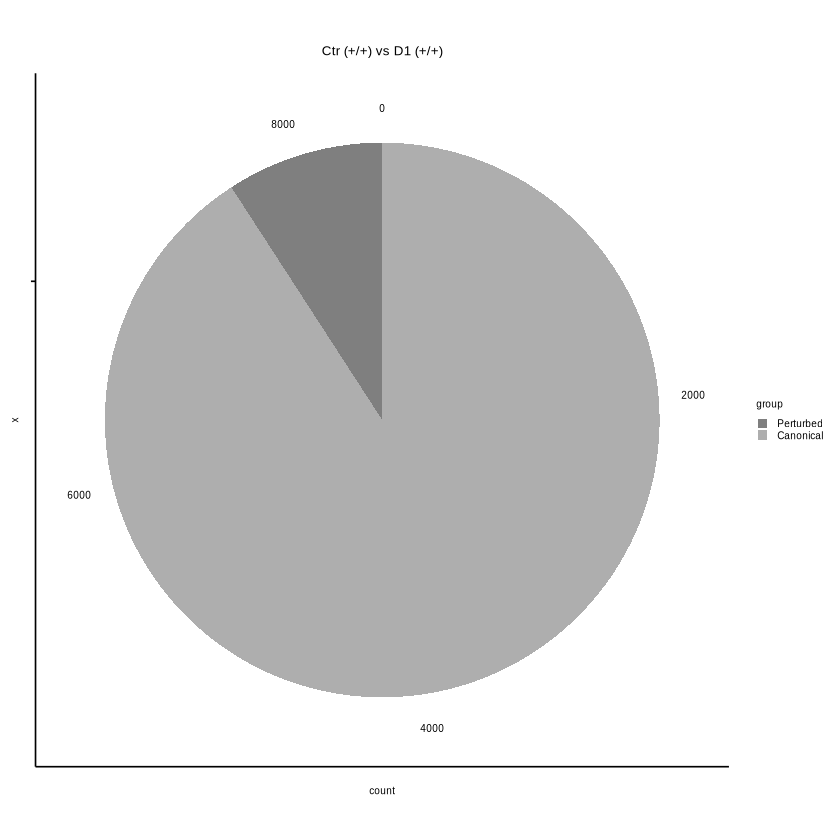

In [108]:
ptpg_class_color <- c("Perturbed"="#7f7f7f", "Canonical"="#AEAEAE")
data <- table(ptpg_res_1 %>% dplyr::mutate(ptpg_class=ifelse(ptpg_class=="Canonical", "Canonical", "Perturbed")) %>% dplyr::pull(ptpg_class)) %>% data.frame() %>% dplyr::rename(group=Var1, count=Freq) %>% dplyr::mutate(group=factor(group, levels=names(ptpg_class_color)))
data
p_pl_1 <- ggplot(data, aes(x="", y=count, fill=group)) +
    geom_col(width=1) +
    coord_polar(theta="y") + 
    scale_fill_manual(values=ptpg_class_color) + 
    ggtitle("Ctr (+/+) vs D1 (+/+)") + 
    guides(fill=guide_legend(ncol=1, override.aes=list(alpha=1, size=1.5), keywidth=0.25, keyheight=0.25, default.unit="cm"))
p_pl_1

In [110]:
ptpg_class_color <- c("Perturbed"="#7f7f7f", "Canonical"="#AEAEAE")
data <- table(ptpg_res_2 %>% dplyr::mutate(ptpg_class=ifelse(ptpg_class=="Canonical", "Canonical", "Perturbed")) %>% dplyr::pull(ptpg_class)) %>% data.frame() %>% dplyr::rename(group=Var1, count=Freq) %>% dplyr::mutate(group=factor(group, levels=names(ptpg_class_color)))
data
p_pl_2 <- ggplot(data, aes(x="", y=count, fill=group)) +
    geom_col(width=1) +
    coord_polar(theta="y") + 
    scale_fill_manual(values=ptpg_class_color) + 
    ggtitle("Ctr (+/+) vs D3 (+/+)") + 
    guides(fill=guide_legend(ncol=1, override.aes=list(alpha=1, size=1.5), keywidth=0.25, keyheight=0.25, default.unit="cm"))

group,count
<fct>,<int>
Canonical,7606
Perturbed,827


In [117]:
head(ptpg_res_7)

gene,wald_stat,df,p_val_wald,p_val_adj_wald,ptpg_wald,ptpg_class,contrast
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<fct>,<chr>


In [116]:
table(ptpg_res_7 %>% dplyr::mutate(ptpg_class=ifelse(ptpg_class=="Canonical", "Canonical", "Perturbed")) %>% dplyr::pull(ptpg_class)) %>% data.frame()

Freq
<int>


In [114]:
ptpg_class_color <- c("Perturbed"="#7f7f7f", "Canonical"="#AEAEAE")
data <- table(ptpg_res_7 %>% dplyr::mutate(ptpg_class=ifelse(ptpg_class=="Canonical", "Canonical", "Perturbed")) %>% dplyr::pull(ptpg_class)) %>% data.frame() %>% dplyr::rename(group=Var1, count=Freq) %>% dplyr::mutate(group=factor(group, levels=names(ptpg_class_color)))
data
p_pl_2 <- ggplot(data, aes(x="", y=count, fill=group)) +
    geom_col(width=1) +
    coord_polar(theta="y") + 
    scale_fill_manual(values=ptpg_class_color) + 
    ggtitle("Ctr (+/+) vs D3 (+/+)") + 
    guides(fill=guide_legend(ncol=1, override.aes=list(alpha=1, size=1.5), keywidth=0.25, keyheight=0.25, default.unit="cm"))

ERROR: [1m[33mError[39m in `dplyr::rename()`:[22m
[33m![39m Can't rename columns that don't exist.
[31m✖[39m Column `Var1` doesn't exist.


In [ ]:
ptpg_class_color <- color$sample_group[c(" IFNAR_fl_Baseline_D0", "IFNAR_fl_LysM_cre_Baseline_D0")]
ptpg_class_color[2] <- scales::alpha(ptpg_class_color[2], 0.5)
data <- table(ptpg_res_4 %>% dplyr::filter(ptpg_class %in% names(ptpg_class_color)) %>% dplyr::pull(ptpg_class)) %>% data.frame() %>% dplyr::rename(group=Var1, count=Freq) %>% dplyr::mutate(group=factor(group, levels=names(ptpg_class_color)))
data
p_pl_4 <- ggplot(data, aes(x="", y=count, fill=group)) +
    geom_col(width=1) +
    coord_polar(theta="y") + 
    scale_fill_manual(values=ptpg_class_color) + 
    ggtitle("Ctr (+/+) vs D1 (+/+)") + 
    guides(fill=guide_legend(ncol=1, override.aes=list(alpha=1, size=1.5), keywidth=0.25, keyheight=0.25, default.unit="cm"))

In [ ]:
ptpg_class_color <- color$sample_group[c("IFNAR_fl_CpG_D3", "IFNAR_fl_LysM_cre_CpG_D3")]
ptpg_class_color[2] <- scales::alpha(ptpg_class_color[2], 0.5)
data <- table(ptpg_res_6 %>% dplyr::filter(ptpg_class %in% names(ptpg_class_color)) %>% dplyr::pull(ptpg_class)) %>% data.frame() %>% dplyr::rename(group=Var1, count=Freq) %>% dplyr::mutate(group=factor(group, levels=names(ptpg_class_color)))
data
p_pl_5 <- ggplot(data, aes(x="", y=count, fill=group)) +
    geom_col(width=1) +
    coord_polar(theta="y") + 
    scale_fill_manual(values=ptpg_class_color) + 
    ggtitle("Ctr (+/+) vs D1 (+/+)") + 
    guides(fill=guide_legend(ncol=1, override.aes=list(alpha=1, size=1.5), keywidth=0.25, keyheight=0.25, default.unit="cm"))

In [ ]:
pdf("result/figures/1_scRNAseq/panel_5/p_pl_ptg_counts.pdf", width=5, height=7.5)

gridExtra::grid.arrange(
    
    p_pl_1 %>% egg::set_panel_size(., width=unit(2.5, "cm"), height=unit(2.5, "cm")), 
    p_pl_2 %>% egg::set_panel_size(., width=unit(2.5, "cm"), height=unit(2.5, "cm")), 
    p_pl_3 %>% egg::set_panel_size(., width=unit(2.5, "cm"), height=unit(2.5, "cm")), 
    p_pl_4 %>% egg::set_panel_size(., width=unit(2.5, "cm"), height=unit(2.5, "cm")), 
    p_pl_5 %>% egg::set_panel_size(., width=unit(2.5, "cm"), height=unit(2.5, "cm")), 
    ncol=2
    
)

dev.off()